# Data Visualization Exercises

In this exercise, we will reproduce the graphics from the class slides. The purpose is to illustrate different types of plots and demonstrate various features of Seaborn and matplotlib.

## General housekeeping items

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

## Import datasets

In these examples, we are going to use several datasets:
- [International Monetary Fund GDP data](https://www.imf.org/en/Publications/WEO/weo-database/2025/April/).
- [Seaborn diamonds data](https://ggplot2.tidyverse.org/reference/diamonds.html)
- [Seaborn taxi data](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page).
- [Seaborn Titanic data](https://www.kaggle.com/c/titanic/data).
- [Alabama and Tennessee football seasons](https://www.sports-reference.com/).

Let's import and wrangle the data.

In [27]:
gdp = pd.read_excel('imf_weo_data.xlsx')
gdp.columns = gdp.columns.astype(str) #some columns were read as numbers, need to convert to string
gdp_top10 = gdp.sort_values('2022', ascending=False).head(10).reset_index(drop=True) #keep only top 10 countries by GDP

diamonds = sns.load_dataset('diamonds')
# diamonds = pd.read_pickle('diamonds.pkl')
diamonds = diamonds[diamonds['carat'] < 1.5]

taxis = sns.load_dataset('taxis')
# taxis = pd.read_pickle('taxis.pkl')

titanic = sns.load_dataset('titanic')
# titanic = pd.read_pickle('titanic.pkl')

ua_ut_seasons = pd.read_pickle('ua_ut_seasons.pkl')

## Bar chart examples
Let’s try out a bar chart depicting the same information in a 'quick and dirty' exploratory way:

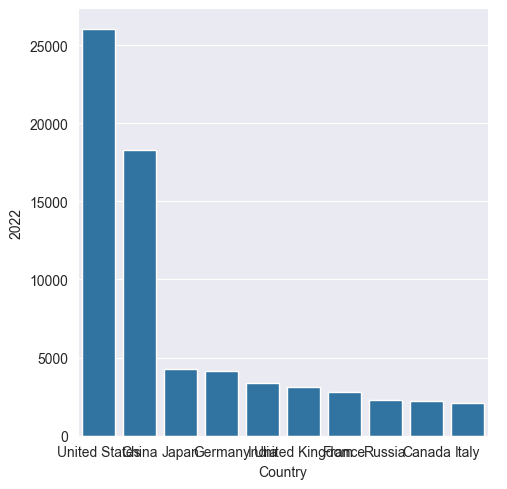

In [28]:
sns.catplot(data=gdp_top10,
            x="Country",
            y="2022",
            kind="bar"
            )

plt.show()

What if we want to flip the axes so that the country names are on the y-axis and the bars extend horizontally?

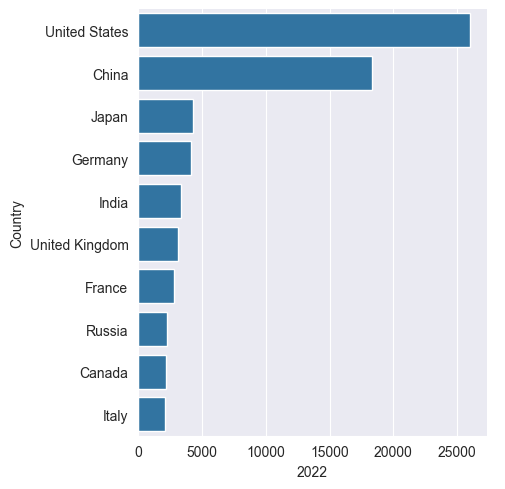

In [29]:
sns.catplot(data=gdp_top10,
            x="2022",
            y="Country",
            kind="bar"
            )

plt.show()

OK, now let's make it look a little better for a presentation. We will adjust the size, add labels, and format the x-axis with commas.

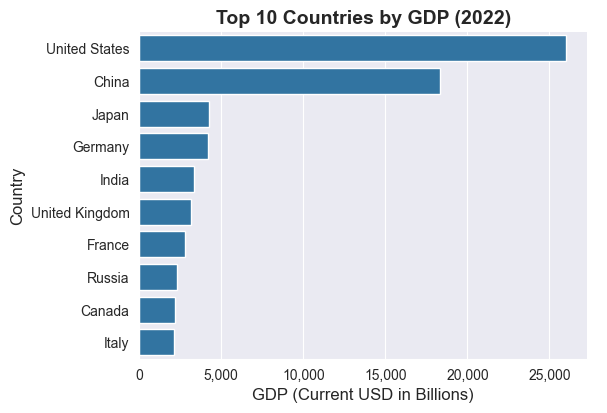

In [30]:
sns.catplot(data=gdp_top10,
            x="2022",
            y="Country",
            kind="bar",
            height=4,
            aspect=1.5
            )

plt.title('Top 10 Countries by GDP (2022)', fontsize=14, weight='bold')
plt.xlabel('GDP (Current USD in Billions)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.show()

Now on your own, create a chart using the taxi data. Get creative and use wrangling tools to prep or summarize the data! Use AI tools to guide you!

Below is an example, plot, but try something different!

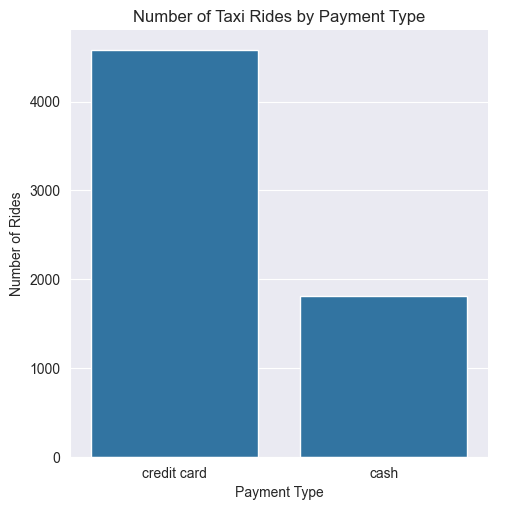

In [31]:
sns.catplot(data=taxis,
            x='payment',
            kind='count',
            )

plt.title('Number of Taxi Rides by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Number of Rides')
plt.show()

## Histogram examples

Let’s create a histogram of prices using the diamonds data:

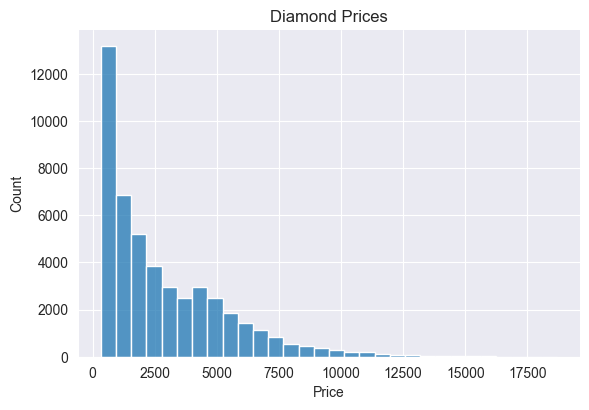

In [32]:
sns.displot(data=diamonds,
             x='price',
             bins=30,
             height=4,
             aspect=1.5,
             )

plt.title('Diamond Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

Create a histogram of fares using the taxi data:

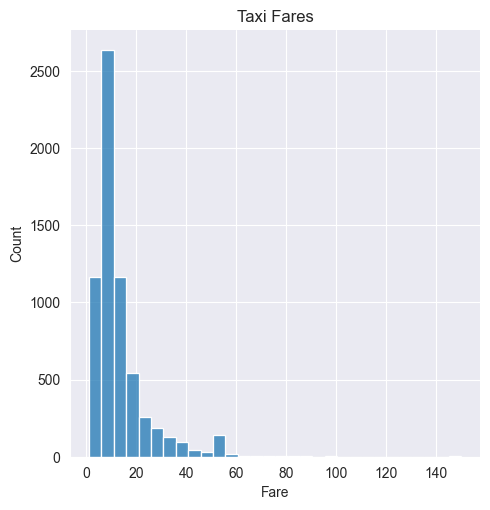

In [33]:
sns.displot(data=taxis,
             x='fare',
             bins=30
             )

plt.title('Taxi Fares')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

Create a histogram of passenger age using the Titanic data:

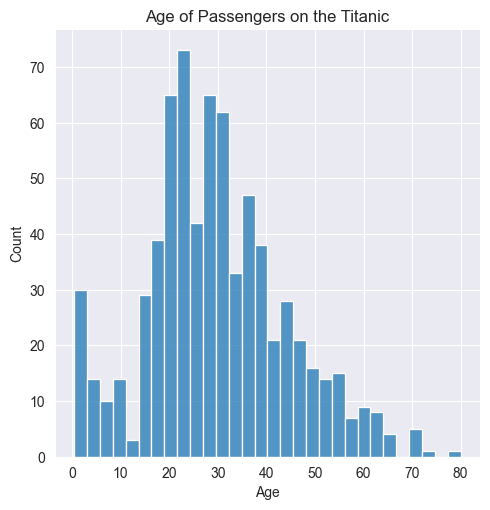

In [34]:
sns.displot(data=titanic,
            x='age',
            bins=30
            )

plt.title('Age of Passengers on the Titanic')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## Boxplot examples
Next, let’s create a boxplot of ages by class using the Titanic dataset:

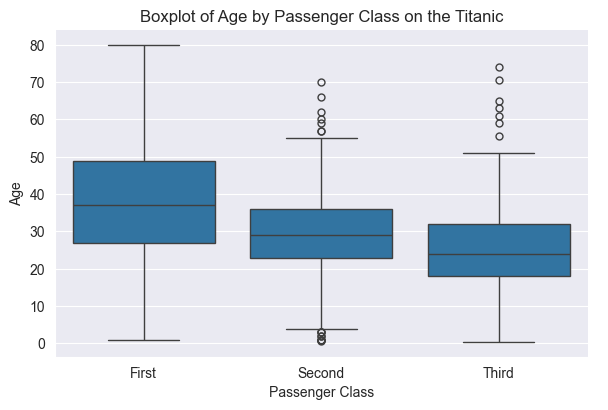

In [35]:
sns.catplot(data=titanic,
            x="class",
            y="age",
            kind="box",
            height=4,
            aspect=1.5,
            )

plt.title('Boxplot of Age by Passenger Class on the Titanic')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

Create a boxplot of fares by pickup location using the taxis data:

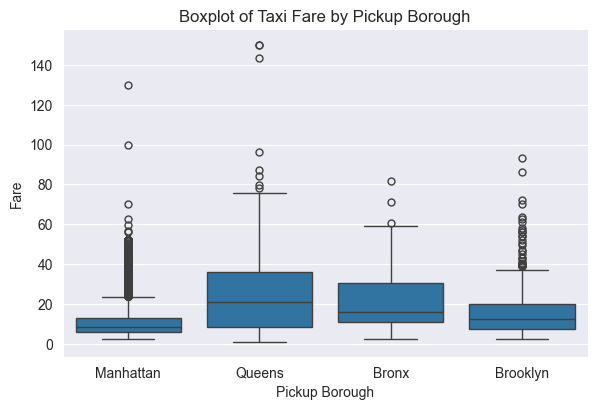

In [36]:
sns.catplot(data=taxis,
            x="pickup_borough",
            y="fare",
            kind="box",
            height=4,
            aspect=1.5,
            )

plt.title('Boxplot of Taxi Fare by Pickup Borough')
plt.xlabel('Pickup Borough')
plt.ylabel('Fare')

plt.show()

## Line chart examples

Let’s create some line charts using Alabama and Tennessee’s season records since 1996. Let's begin with a simple line plot.

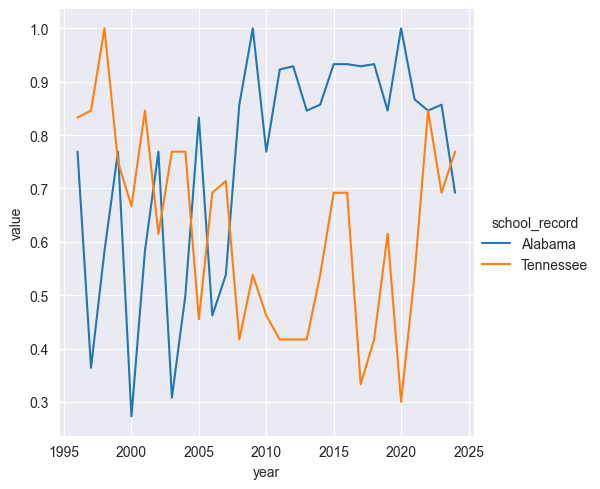

In [37]:
sns.relplot(data=ua_ut_seasons,
            x='year',
            y='value',
            hue='school_record',
            kind='line'
            )

plt.show()

Let's make the line plot look a little better by adding titles, colors, and other features.

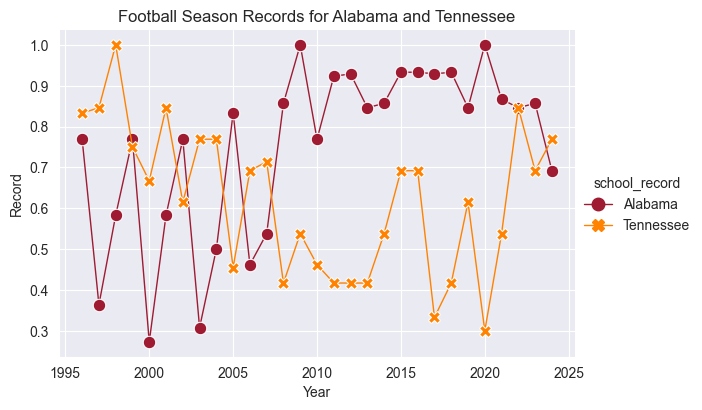

In [38]:
# Define manual color palette for each school_record
palette = {'Alabama': '#9E1B32', 'Tennessee': '#FF8200'}

sns.relplot(data=ua_ut_seasons,
            x='year',
            y='value',
            hue='school_record',
            style='school_record',
            kind='line',
            markers=True, # Display markers
            dashes=False, # Solid lines
            linewidth=1.0,
            markersize=9,
            palette=palette,
            height=4,
            aspect=1.5
            )

plt.title('Football Season Records for Alabama and Tennessee')
plt.xlabel('Year')
plt.ylabel('Record')

plt.show()

Let's try the same thing, except subplotting (or faceting) such that we get separate graphs for each team.

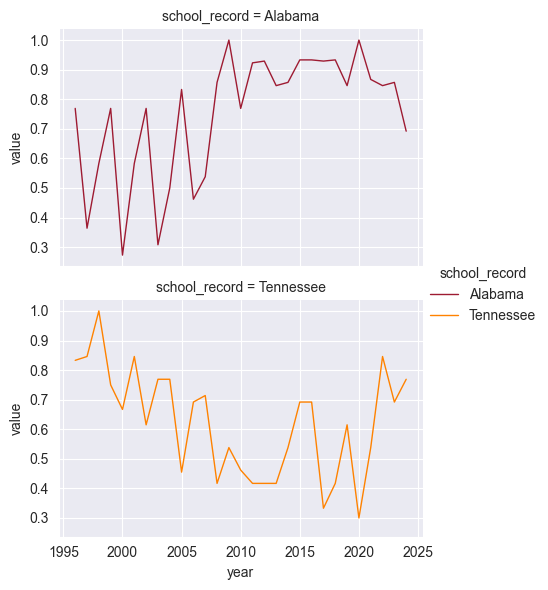

In [39]:
sns.relplot(data=ua_ut_seasons,
            x='year',
            y='value',
            hue='school_record',
            style='school_record',
            kind='line',
            dashes=False, # Solid lines
            linewidth=1.0,
            row='school_record',
            palette=palette,
            height=3,
            aspect=1.5
            )

plt.show()

## Scatter plot examples

Let’s recreate a scatter plot using the diamonds dataset. As before, we are going to visualize the relations between three variables (price, carat, and clarity).

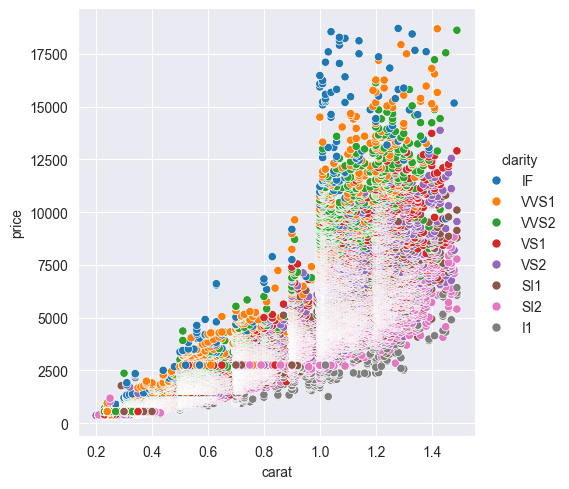

In [40]:
sns.relplot(data=diamonds,
            x='carat',
            y='price',
            hue='clarity',
            kind='scatter'
            )

plt.show()

Let's adjust the graph to use different colors.

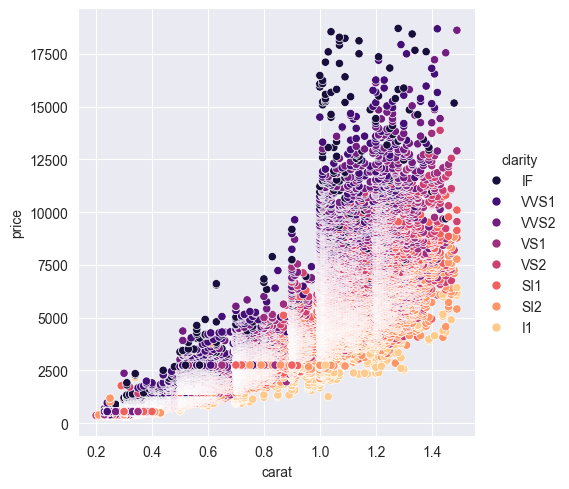

In [41]:
sns.relplot(data=diamonds,
            x='carat',
            y='price',
            hue='clarity',
            kind='scatter',
            palette=sns.color_palette("magma",
                                      n_colors=len(diamonds['clarity'].unique())
                                      ),
            )

plt.show()

Scatterplots can suffer from overplotting. And this one definitely does. Here let’s tinker with two common tools to alleviate overplotting. One way to handle overplotting is to plot a random sample of the data. To do so, we will just “wrap” the diamonds data set in a sampling function.

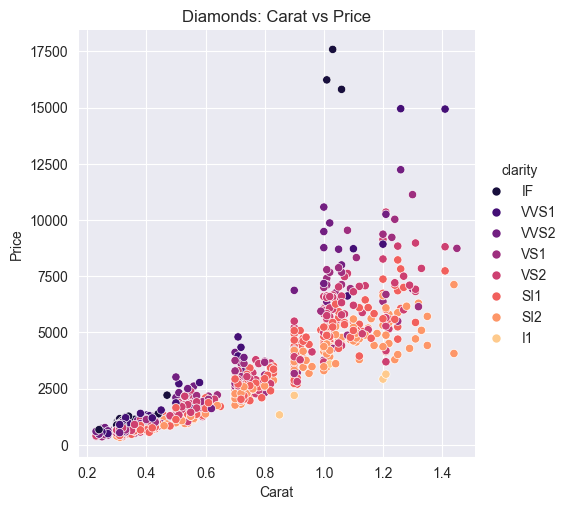

In [42]:
sns.relplot(data=diamonds.sample(n=1000, random_state=42),
            x='carat',
            y='price',
            hue='clarity',
            kind='scatter',
            palette=sns.color_palette("magma",
                                      n_colors=len(diamonds['clarity'].unique())
                                      )
            )

plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Diamonds: Carat vs Price")

plt.show()

That is better. Another way to handle overplotting is to adjust the transparency of the points. We can do this by adjusting the alpha parameter.

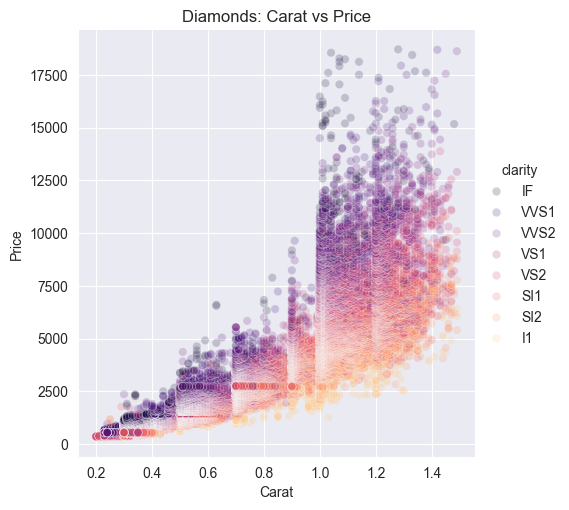

In [43]:
sns.relplot(data=diamonds,
            x='carat',
            y='price',
            hue='clarity',
            kind='scatter',
            palette=sns.color_palette("magma",
                                      n_colors=len(diamonds['clarity'].unique())
                                      ),
            alpha=0.2,
            )

plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Diamonds: Carat vs Price")

plt.show()

Not bad! Notice that the variation in prices gets larger as the diamonds get larger (something we talked about in class earlier). In this case, a log transformation of the axes will adjust for this pattern. We can transform one (or more of the axes) by changing the scale of the axes:

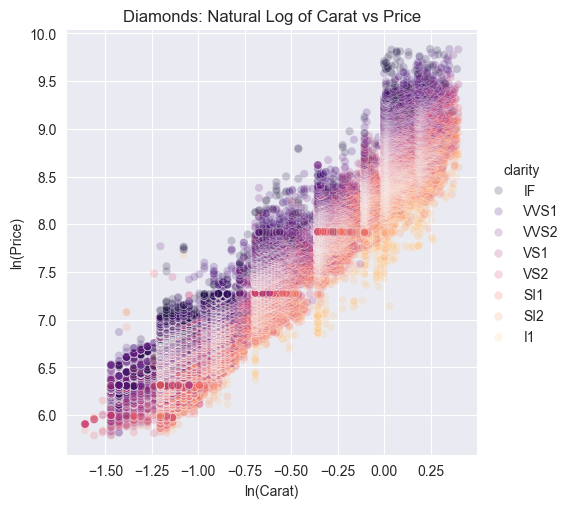

In [44]:
# Create log-transformed columns
diamonds['ln_carat'] = np.log(diamonds['carat'])
diamonds['ln_price'] = np.log(diamonds['price'])

sns.relplot(data=diamonds,
            x='ln_carat',
            y='ln_price',
            hue='clarity',
            kind='scatter',
            palette=sns.color_palette("magma",
                                      n_colors=len(diamonds['clarity'].unique())
                                      ),
            alpha=0.2,
            )

plt.xlabel("ln(Carat)")
plt.ylabel("ln(Price)")
plt.title("Diamonds: Natural Log of Carat vs Price")
plt.show()

## Axis scaling example

The scale of the x or y axis can dramatically change the appearance of, and inferences from, a graphic. Always consider the “scale” of data visualizations. Below, I will illustrate how Alabama’s year over year seasonal performance from 2010-2023 can look very different based on how the y-axis was scaled.

“Zoomed” in:

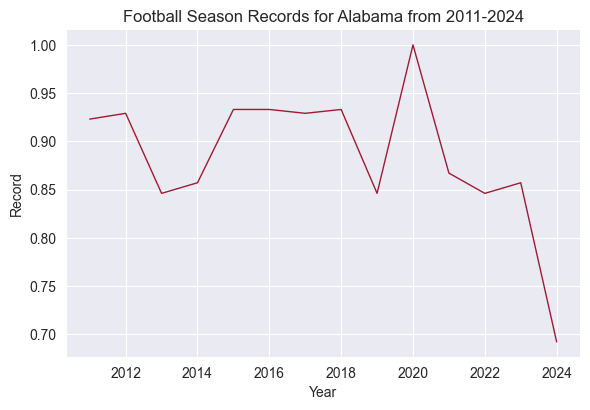

In [45]:
ua_data = ua_ut_seasons[(ua_ut_seasons['school_record'] == 'Alabama') & (ua_ut_seasons['year'] > 2010)]

# Plot the line
sns.relplot(data=ua_data,
            x='year',
            y='value',
            kind='line',
            color='#9E1B32',
            linewidth=1.0,
            height=4,
            aspect=1.5
            )

plt.title('Football Season Records for Alabama from 2011-2024')
plt.xlabel('Year')
plt.ylabel('Record')

plt.show()

“Zoomed” out:

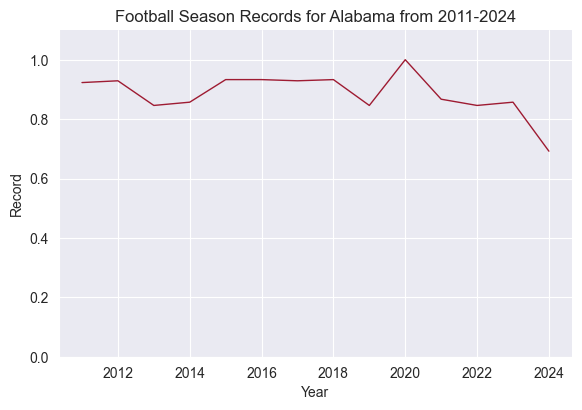

In [46]:
# Plot the line
sns.relplot(data=ua_data,
            x='year',
            y='value',
            kind='line',
            color='#9E1B32',
            linewidth=1.0,
            height=4,
            aspect=1.5
            )

plt.title('Football Season Records for Alabama from 2011-2024')
plt.xlabel('Year')
plt.ylabel('Record')

plt.ylim(0, 1.1)
plt.yticks(np.arange(0, 1.01, 0.2))

plt.show()